<a href="https://colab.research.google.com/github/Siddhi-Sovle/Data-Science/blob/main/Text_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python -m spacy download en_core_web

2023-10-04 05:06:21.163943: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-04 05:06:22.572047: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

✘ No compatible package found for 'en_core_web' (spaCy v3.6.1)



In [ ]:
pip install spacy

In [ ]:
pip install nltk

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import string
import spacy
from matplotlib.pyplot import imread
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize

In [ ]:
df = pd.read_csv("/content/Elon_musk.csv",encoding='ISO-8859-1',error_bad_lines=False)

<ipython-input-5-82108f94d9cd>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv("/content/Elon_musk.csv",encoding='ISO-8859-1',error_bad_lines=False)


In [ ]:
df[0:20]

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
5,6,Happy New Year of the Ox! https://t.co/9WFKMYu2oj
6,7,"Frodo was the underdoge,\nAll thought he would..."
7,8,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)
8,9,@flcnhvy @anonyx10 Indeed! Tweets definitely d...
9,10,The most entertaining outcome is the most likely


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1999 non-null   int64 
 1   Text        1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


#**TEXT PREPROCESSING**

In [ ]:
data = [text.strip() for text in df['Text']] #Removing all the trailing character along with the unnescesary space

In [ ]:
data[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [ ]:
data = [text for text in data if text]

In [ ]:
data1 = ' '.join(data)

In [ ]:
data1

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [ ]:
#Lowercasing
text = data1.lower()

In [ ]:
text

'@kunalb11 i\x92m an alien @id_aa_carmack ray tracing on cyberpunk with hdr is next-level. have you tried it? @joerogan @spotify great interview! @gtera27 doge is underestimated @teslacn congratulations tesla china for amazing execution last year. now on to the next for even more!! happy new year of the ox! https://t.co/9wfkmyu2oj frodo was the underdoge,\nall thought he would fail,\nhimself most of all. https://t.co/zgxjfdzzrm @owensparks_ @flcnhvy @anonyx10 haha thanks :) @flcnhvy @anonyx10 indeed! tweets definitely do not represent real-world time allocation. the most entertaining outcome is the most likely @givedirectly just sent some just agree to do clubhouse with @kanyewest https://t.co/3rwe9uhsts @geoffkeighley @unrealengine it\x92s getting real bought some dogecoin for lil x, so he can be a toddler hodler @joshmanmode he definitely has issues, but the sentencing seems a bit high @freewalletorg thanks for fixing @freewalletorg please unlock my account @astrojordy <u+0001f923><u

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#Tokenizing
tokens = word_tokenize(text)

In [ ]:
print(tokens)

['@', 'kunalb11', 'i\x92m', 'an', 'alien', '@', 'id_aa_carmack', 'ray', 'tracing', 'on', 'cyberpunk', 'with', 'hdr', 'is', 'next-level', '.', 'have', 'you', 'tried', 'it', '?', '@', 'joerogan', '@', 'spotify', 'great', 'interview', '!', '@', 'gtera27', 'doge', 'is', 'underestimated', '@', 'teslacn', 'congratulations', 'tesla', 'china', 'for', 'amazing', 'execution', 'last', 'year', '.', 'now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '!', '!', 'happy', 'new', 'year', 'of', 'the', 'ox', '!', 'https', ':', '//t.co/9wfkmyu2oj', 'frodo', 'was', 'the', 'underdoge', ',', 'all', 'thought', 'he', 'would', 'fail', ',', 'himself', 'most', 'of', 'all', '.', 'https', ':', '//t.co/zgxjfdzzrm', '@', 'owensparks_', '@', 'flcnhvy', '@', 'anonyx10', 'haha', 'thanks', ':', ')', '@', 'flcnhvy', '@', 'anonyx10', 'indeed', '!', 'tweets', 'definitely', 'do', 'not', 'represent', 'real-world', 'time', 'allocation', '.', 'the', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', '@', 'gi

In [ ]:
#Removes Punctuation
tokens = [word for word in tokens if word.isalnum()]

In [ ]:
print(tokens)

['kunalb11', 'an', 'alien', 'ray', 'tracing', 'on', 'cyberpunk', 'with', 'hdr', 'is', 'have', 'you', 'tried', 'it', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'is', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'for', 'amazing', 'execution', 'last', 'year', 'now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'happy', 'new', 'year', 'of', 'the', 'ox', 'https', 'frodo', 'was', 'the', 'underdoge', 'all', 'thought', 'he', 'would', 'fail', 'himself', 'most', 'of', 'all', 'https', 'flcnhvy', 'anonyx10', 'haha', 'thanks', 'flcnhvy', 'anonyx10', 'indeed', 'tweets', 'definitely', 'do', 'not', 'represent', 'time', 'allocation', 'the', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'givedirectly', 'just', 'sent', 'some', 'just', 'agree', 'to', 'do', 'clubhouse', 'with', 'kanyewest', 'https', 'geoffkeighley', 'unrealengine', 'getting', 'real', 'bought', 'some', 'dogecoin', 'for', 'lil', 'x', 'so', 'he', 'can', 'be', 'a', 'toddler', '

In [ ]:
#Removing Stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = stopwords.words('english')
words_list = [
    "a", "a's", "able", "about", "above", "according", "accordingly", "across", "actually", "after",
    "afterwards", "again", "against", "ain't", "all", "allow", "allows", "almost", "alone", "along",
    "already", "also", "although", "always", "am", "among", "amongst", "an", "and", "another", "any",
    "anybody", "anyhow", "anyone", "anything", "anyway", "anyways", "anywhere", "apart", "appear", "appreciate",
    "appropriate", "are", "aren't", "around", "as", "aside", "ask", "asking", "associated", "at", "available",
    "away", "awfully", "b", "be", "became", "because", "become", "becomes", "becoming", "been", "before",
    "beforehand", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between",
    "beyond", "both", "brief", "but", "by", "c", "c'mon", "c's", "came", "can", "can't", "cannot", "cant",
    "cause", "causes", "certain", "certainly", "changes", "clearly", "co", "com", "come", "comes",
    "concerning", "consequently", "consider", "considering", "contain", "containing", "contains",
    "corresponding", "could", "couldn't", "course", "currently", "d", "definitely", "described", "despite",
    "did", "didn't", "different", "do", "does", "doesn't", "doing", "don't", "done", "down", "downwards", "during",
    "e", "each", "edu", "eg", "eight", "either", "else", "elsewhere", "enough", "entirely", "especially", "et",
    "etc", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly",
    "example", "except", "f", "far", "few", "fifth", "first", "five", "followed", "following", "follows", "for",
    "former", "formerly", "forth", "four", "from", "further", "furthermore", "g", "get", "gets", "getting", "given",
    "gives", "go", "goes", "going", "gone", "got", "gotten", "greetings", "h", "had", "hadn't", "happens", "hardly",
    "has", "hasn't", "have", "haven't", "having", "he", "he's", "hello", "help", "hence", "her", "here", "here's",
    "hereafter", "hereby", "herein", "hereupon", "hers", "herself", "hi", "him", "himself", "his", "hither", "hopefully",
    "how", "howbeit", "however", "i", "i'd", "i'll", "i'm", "i've", "ie", "if", "ignored", "immediate", "in", "inasmuch",
    "inc", "indeed", "indicate", "indicated", "indicates", "inner", "insofar", "instead", "into", "inward", "is", "isn't",
    "it", "it'd", "it'll", "it's", "its", "itself", "j", "just", "k", "keep", "keeps", "kept", "know", "knows", "known",
    "l", "last", "lately", "later", "latter", "latterly", "least", "less", "lest", "let", "let's", "like", "liked",
    "likely", "little", "look", "looking", "looks", "ltd", "m", "mainly", "many", "may", "maybe", "me", "mean",
    "meanwhile", "merely", "might", "more", "moreover", "most", "mostly", "much", "must", "my", "myself", "n", "name",
    "namely", "nd", "near", "nearly", "necessary", "need", "needs", "neither", "never", "nevertheless", "new", "next",
    "nine", "no", "nobody", "non", "none", "noone", "nor", "normally", "not", "nothing", "novel", "now", "nowhere", "o",
    "obviously", "of", "off", "often", "oh", "ok", "okay", "old", "on", "once", "one", "ones", "only", "onto", "or", "other",
    "others", "otherwise", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "own", "p",
    "particular", "particularly", "per", "perhaps", "placed", "please", "plus", "possible", "presumably", "probably",
    "provides", "q", "que", "quite", "qv", "r", "rather", "rd", "re", "really", "reasonably", "regarding", "regardless",
    "regards", "relatively", "respectively", "right", "s", "said", "same", "saw", "say", "saying", "says", "second",
    "secondly", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent",
    "serious", "seriously", "seven", "several", "shall", "she", "should", "shouldn't", "since", "six", "so", "some",
    "somebody", "somehow", "someone", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry",
    "specified", "specify", "specifying", "still", "sub", "such", "sup", "sure", "t", "t's", "take", "taken", "tell",
    "tends", "th", "than", "thank", "thanks", "thanx", "that", "that's", "thats", "the", "their", "theirs", "them",
    "themselves", "then", "thence", "there", "there's", "thereafter", "thereby", "therefore", "therein", "theres",
    "thereupon", "these", "they", "they'd", "they'll", "they're", "they've", "think", "third", "this", "thorough",
    "thoroughly", "those", "though", "three", "through", "throughout", "thru", "thus", "to", "together", "too", "took",
    "toward", "towards", "tried", "tries", "truly", "try", "trying", "twice", "two", "u", "un", "under", "unfortunately",
    "unless", "unlikely", "until", "unto", "up", "upon", "us", "use", "used", "useful", "uses", "using", "usually", "uucp",
    "v", "value", "various", "very", "via", "viz", "vs", "w", "want", "wants", "was", "wasn't", "way", "we", "we'd",
    "we'll", "we're", "we've", "welcome", "well", "went", "were", "weren't", "what", "what's", "whatever", "when",
    "whence", "whenever", "where", "where's", "whereafter", "whereas", "whereby", "wherein", "whereupon", "wherever",
    "whether", "which", "while", "whither", "who", "who's", "whoever", "whole", "whom", "whose", "why", "will",
    "willing", "wish", "with", "within", "without", "won't", "wonder", "would", "wouldn't", "x", "y", "yes", "yet",
    "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves", "z", "zero"
]
stop_words.append(words_list)
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
tokens = [word for word in tokens if word not in stop_words]

In [ ]:
print(tokens)

['kunalb11', 'alien', 'ray', 'tracing', 'cyberpunk', 'hdr', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'next', 'even', 'happy', 'new', 'year', 'ox', 'https', 'frodo', 'underdoge', 'thought', 'would', 'fail', 'https', 'flcnhvy', 'anonyx10', 'haha', 'thanks', 'flcnhvy', 'anonyx10', 'indeed', 'tweets', 'definitely', 'represent', 'time', 'allocation', 'entertaining', 'outcome', 'likely', 'givedirectly', 'sent', 'agree', 'clubhouse', 'kanyewest', 'https', 'geoffkeighley', 'unrealengine', 'getting', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'joshmanmode', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'freewalletorg', 'thanks', 'fixing', 'freewalletorg', 'please', 'unlock', 'account', 'astrojordy', 'true', 'power', 'haha', 'https', 'freewalletorg', 'crypto', 'wallet', 'give', 'private', 'keys', 'avoided', 'costs', 'freewal

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
doc = nlp(' '.join(tokens))
doc

kunalb11 alien ray tracing cyberpunk hdr tried joerogan spotify great interview gtera27 doge underestimated teslacn congratulations tesla china amazing execution last year next even happy new year ox https frodo underdoge thought would fail https flcnhvy anonyx10 haha thanks flcnhvy anonyx10 indeed tweets definitely represent time allocation entertaining outcome likely givedirectly sent agree clubhouse kanyewest https geoffkeighley unrealengine getting real bought dogecoin lil x toddler hodler joshmanmode definitely issues sentencing seems bit high freewalletorg thanks fixing freewalletorg please unlock account astrojordy true power haha https freewalletorg crypto wallet give private keys avoided costs freewalletorg app sucks rt spacex nasa selected falcon heavy launch first two elements lunar gateway together one mission https ajtourville yes blkmdl3 rationaletienne predict cash flow reasonably well starlink ipo rationaletienne starlink staggeringly difficult technical amp economic en

In [ ]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in tokens]

In [ ]:
print(stemmed_tokens)

['kunalb11', 'alien', 'ray', 'trace', 'cyberpunk', 'hdr', 'tri', 'joerogan', 'spotifi', 'great', 'interview', 'gtera27', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'next', 'even', 'happi', 'new', 'year', 'ox', 'http', 'frodo', 'underdog', 'thought', 'would', 'fail', 'http', 'flcnhvi', 'anonyx10', 'haha', 'thank', 'flcnhvi', 'anonyx10', 'inde', 'tweet', 'definit', 'repres', 'time', 'alloc', 'entertain', 'outcom', 'like', 'givedirectli', 'sent', 'agre', 'clubhous', 'kanyewest', 'http', 'geoffkeighley', 'unrealengin', 'get', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'joshmanmod', 'definit', 'issu', 'sentenc', 'seem', 'bit', 'high', 'freewalletorg', 'thank', 'fix', 'freewalletorg', 'pleas', 'unlock', 'account', 'astrojordi', 'true', 'power', 'haha', 'http', 'freewalletorg', 'crypto', 'wallet', 'give', 'privat', 'key', 'avoid', 'cost', 'freewalletorg', 'app', 'suck', 'rt', 'spacex', 'nasa', 'select', 'falcon', 'heav

In [ ]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
#Lemmatization
lemma = WordNetLemmatizer()
lemmatized_tokens = [lemma.lemmatize(word) for word in tokens]
print(lemmatized_tokens)

['kunalb11', 'alien', 'ray', 'tracing', 'cyberpunk', 'hdr', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimated', 'teslacn', 'congratulation', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'next', 'even', 'happy', 'new', 'year', 'ox', 'http', 'frodo', 'underdoge', 'thought', 'would', 'fail', 'http', 'flcnhvy', 'anonyx10', 'haha', 'thanks', 'flcnhvy', 'anonyx10', 'indeed', 'tweet', 'definitely', 'represent', 'time', 'allocation', 'entertaining', 'outcome', 'likely', 'givedirectly', 'sent', 'agree', 'clubhouse', 'kanyewest', 'http', 'geoffkeighley', 'unrealengine', 'getting', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'joshmanmode', 'definitely', 'issue', 'sentencing', 'seems', 'bit', 'high', 'freewalletorg', 'thanks', 'fixing', 'freewalletorg', 'please', 'unlock', 'account', 'astrojordy', 'true', 'power', 'haha', 'http', 'freewalletorg', 'crypto', 'wallet', 'give', 'private', 'key', 'avoided', 'cost', 'freewalletorg', 

In [ ]:
pip install nltk matplotlib gensim

#**EXPLORATORY DATA ANALYSIS**

In [ ]:
import nltk
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from gensim import corpora,models
from pprint import pprint


In [ ]:
#Word Frequency Analysis
freq_dist = FreqDist(tokens)
#Displaying the top 10 most frequent words
print(freq_dist.most_common(10))

[('https', 655), ('spacex', 242), ('amp', 219), ('tesla', 167), ('erdayastronaut', 142), ('rt', 127), ('ppathole', 123), ('flcnhvy', 114), ('yes', 86), ('great', 76)]


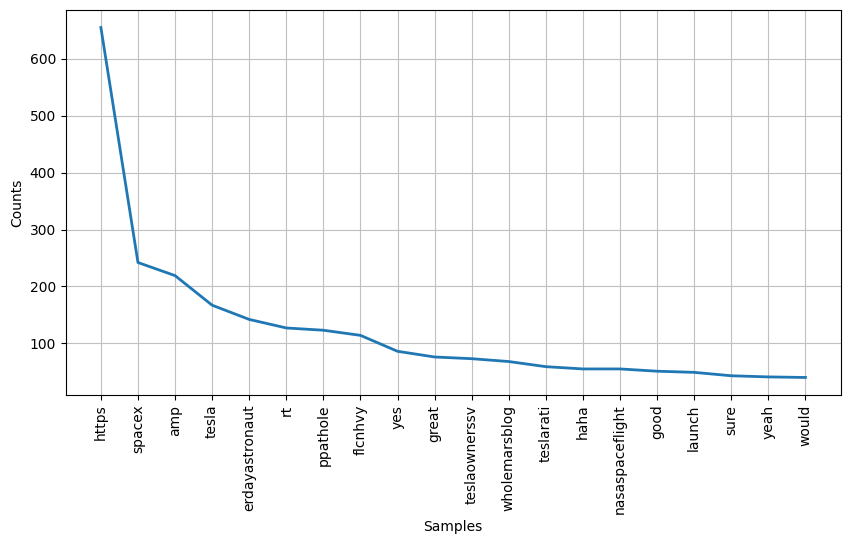

In [ ]:
# Bar chart for word frequency
plt.figure(figsize=(10,5))
freq_dist.plot(20, cumulative=False)
plt.show()

In [ ]:
# Word Cloud visualization
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(' '.join(tokens))

In [ ]:
wordcloud

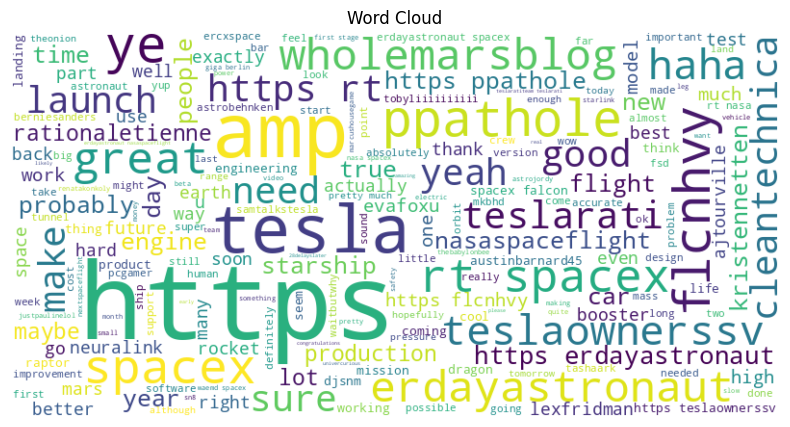

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud')
plt.show()

#**FEATURE ENGINEERING**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#BAG OF WORDS(BOW)
cv = CountVectorizer()
X_bow = cv.fit_transform(tokens)

In [ ]:
feature_names_bow = cv.get_feature_names_out()

In [ ]:
print(feature_names_bow)

['10' '100' '1000' ... 'zwiebelbach' 'zzcool' 'ðogecoin']


In [ ]:
cv.vocabulary_

{'kunalb11': 2080,
 'alien': 208,
 'ray': 3011,
 'tracing': 3902,
 'cyberpunk': 955,
 'hdr': 1717,
 'tried': 3923,
 'joerogan': 2011,
 'spotify': 3521,
 'great': 1649,
 'interview': 1947,
 'gtera27': 1668,
 'doge': 1113,
 'underestimated': 3994,
 'teslacn': 3758,
 'congratulations': 845,
 'tesla': 3754,
 'china': 724,
 'amazing': 235,
 'execution': 1331,
 'last': 2103,
 'year': 4268,
 'next': 2535,
 'even': 1302,
 'happy': 1700,
 'new': 2532,
 'ox': 2682,
 'https': 1803,
 'frodo': 1526,
 'underdoge': 3993,
 'thought': 3827,
 'would': 4244,
 'fail': 1370,
 'flcnhvy': 1461,
 'anonyx10': 262,
 'haha': 1683,
 'thanks': 3793,
 'indeed': 1882,
 'tweets': 3963,
 'definitely': 1010,
 'represent': 3100,
 'time': 3843,
 'allocation': 212,
 'entertaining': 1258,
 'outcome': 2660,
 'likely': 2171,
 'givedirectly': 1613,
 'sent': 3301,
 'agree': 181,
 'clubhouse': 768,
 'kanyewest': 2041,
 'geoffkeighley': 1592,
 'unrealengine': 4025,
 'getting': 1599,
 'real': 3028,
 'bought': 547,
 'dogecoin': 11

In [ ]:
pd.DataFrame.from_records([cv.vocabulary_]).T.sort_values(0, ascending=False).iloc[0:50]

,0
ðogecoin,4299
zzcool,4298
zwiebelbach,4297
zubinanary,4296
zshauladventure,4295
zone,4294
zon,4293
zip2,4292
zikryzamir,4291
zeros,4290


In [ ]:
X_bow_array = X_bow.toarray()

In [ ]:
X_bow_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X_bow_array = X_bow.toarray()
X_bow_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
#TF-IDF(Term Frequency-Inverse Document Frequency)
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vc = TfidfVectorizer()

In [ ]:
tfid = vc.fit_transform(tokens)

In [ ]:
feature_names_tfidf = vc.get_feature_names_out()

In [ ]:
print(feature_names_tfidf)

['10' '100' '1000' ... 'zwiebelbach' 'zzcool' 'ðogecoin']


In [ ]:
X_tfidf_array = tfid.toarray()
X_tfidf_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
vectorizer_ngram_range = CountVectorizer(analyzer='word', ngram_range=(1,1), max_features=1000)
matrix_ngram = vectorizer_ngram_range.fit_transform(data)

In [ ]:
print(vectorizer_ngram_range.get_feature_names_out())

['000' '0001f1e9' '0001f1ea' '0001f3b6' '0001f440' '0001f44d' '0001f495'
 '0001f4af' '0001f525' '0001f5a4' '0001f600' '0001f609' '0001f680'
 '0001f923' '0435' '043b' '043e' '10' '100' '11' '20' '2020' '2192' '2660'
 '26a1' '28delayslater' '30' '300' '330' '39a' '40' '48' '4d' '50' '60'
 '90' 'able' 'about' 'above' 'absolutely' 'access' 'accurate' 'actually'
 'adamklotz_' 'add' 'after' 'again' 'ago' 'agree' 'agreed' 'ahead' 'ai'
 'aiming' 'air' 'ajtourville' 'alex_avoigt' 'all' 'almost' 'already'
 'also' 'although' 'always' 'am' 'amazing' 'amp' 'an' 'analysis' 'and'
 'another' 'any' 'appreciate' 'appreciated' 'approval' 'archillect'
 'architecture' 'are' 'arm' 'around' 'arstechnica' 'art' 'article' 'as'
 'astro_doug' 'astrobehnken' 'astrojordy' 'astronauts' 'astronomiaum' 'at'
 'austin' 'austinbarnard45' 'austinteslaclub' 'automatically' 'autopilot'
 'away' 'awesome' 'back' 'background' 'bad' 'bar' 'base' 'battery' 'bay'
 'bbcsciencenews' 'be' 'because' 'been' 'before' 'being' 'below'
 

#**MODELLING**

In [ ]:
#Sentiment Analysis
from textblob import TextBlob

In [ ]:
doc = str(doc)

In [ ]:
blob = TextBlob(doc)

In [ ]:
sentiment_polarity = blob.sentiment.polarity

In [ ]:
sentiment_polarity
#A value of 0.18 indicates moderately positive sentiment.

0.1847061112244355

In [ ]:
if sentiment_polarity > 0:
    sentiment_label = 'Positive'
elif sentiment_polarity < 0:
    sentiment_label = 'Negative'
else:
    sentiment_label = 'Neutral'

In [ ]:
print(f"Sentiment: {sentiment_label} (Polarity: {sentiment_polarity})")

Sentiment: Positive (Polarity: 0.1847061112244355)


In [ ]:
a = vectorizer_ngram_range.get_feature_names_out()

In [ ]:
from textblob import TextBlob

# Counters for positive and negative sentiments
positive_count = 0
negative_count = 0
pos = []
neg = []

# Iterate through each text
for text in a:
    # Create a TextBlob object
    blob = TextBlob(text)

    # Get the sentiment polarity
    sentiment_polarity = blob.sentiment.polarity

    # Classify as positive, negative, or neutral
    if sentiment_polarity > 0:
        print("Positive: ",text,sentiment_polarity)
        pos.append(text)
        positive_count += 1
    elif sentiment_polarity < 0:
        print("Negative: ",text,sentiment_polarity)
        neg.append(text)
        negative_count += 1
# Display the results
print(f"Number of Positive Sentiments: {positive_count}")
print(f"Number of Negative Sentiments: {negative_count}")
print(pos)
print(neg)

Positive:  able 0.5
Positive:  absolutely 0.2
Positive:  accurate 0.4000000000000001
Positive:  amazing 0.6000000000000001
Positive:  appreciated 0.2
Positive:  awesome 1.0
Negative:  bad -0.6999999999999998
Negative:  base -0.8
Positive:  best 1.0
Positive:  better 0.5
Positive:  certainly 0.21428571428571427
Positive:  clear 0.10000000000000002
Negative:  cold -0.6
Negative:  common -0.3
Positive:  complete 0.1
Negative:  complex -0.3
Positive:  confirmed 0.4
Positive:  cool 0.35
Negative:  crazy -0.6
Negative:  down -0.15555555555555559
Negative:  due -0.125
Negative:  dumb -0.375
Positive:  early 0.1
Positive:  easy 0.43333333333333335
Positive:  exactly 0.25
Negative:  extreme -0.125
Negative:  extremely -0.125
Negative:  false -0.4000000000000001
Positive:  far 0.1
Positive:  fast 0.2
Positive:  favorite 0.5
Negative:  few -0.2
Positive:  fine 0.4166666666666667
Positive:  first 0.25
Positive:  fixed 0.1
Positive:  fly 0.8
Positive:  free 0.4
Positive:  full 0.35
Positive:  fun 0

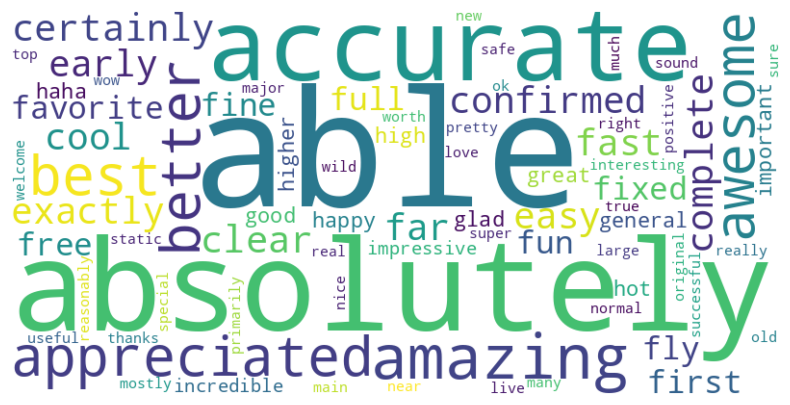

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

positive_words = ['able', 'absolutely', 'accurate', 'amazing', 'appreciated', 'awesome', 'best', 'better', 'certainly', 'clear', 'complete', 'confirmed', 'cool', 'early', 'easy', 'exactly', 'far', 'fast', 'favorite', 'fine', 'first', 'fixed', 'fly', 'free', 'full', 'fun', 'general', 'glad', 'good', 'great', 'haha', 'happy', 'high', 'higher', 'hot', 'important', 'impressive', 'incredible', 'interesting', 'large', 'live', 'love', 'main', 'major', 'many', 'more', 'most', 'mostly', 'much', 'near', 'new', 'nice', 'normal', 'ok', 'old', 'original', 'own', 'positive', 'pretty', 'primarily', 'real', 'really', 'reasonably', 'right', 'safe', 'sound', 'special', 'static', 'successful', 'super', 'sure', 'thanks', 'top', 'true', 'useful', 'very', 'welcome', 'wild', 'worth', 'wow']

# Create a string of positive words
positive_text = ' '.join(positive_words)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


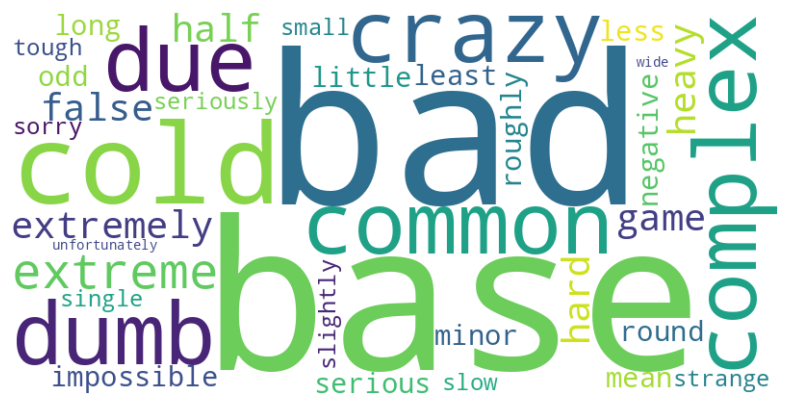

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

negative_words = ['bad', 'base', 'cold', 'common', 'complex', 'crazy', 'down', 'due', 'dumb', 'extreme', 'extremely', 'false', 'few', 'game', 'half', 'hard', 'heavy', 'impossible', 'least', 'less', 'little', 'long', 'mean', 'minor', 'negative', 'odd', 'other', 'roughly', 'round', 'serious', 'seriously', 'single', 'slightly', 'slow', 'small', 'sorry', 'strange', 'tough', 'unfortunately', 'wide']

# Create a string of positive words
negative_text = ' '.join(negative_words)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#**CONCLUSION**

#Over all looking at the text data we can say that the text data is mostly focused on the major events happening at SpaceX along with the improvements with tesla. The whole data is basically a conversation or discussion between space enthusiasts like Erdayastronaut and elon mask fans like flcnhvy, rationaletienne, etc; maybe on twitter.
#Below are some of the major points that was captured from the text data:


*   People are talking about elon mask, tesla, spacex, falcon9(Falcon 9 is a reusable, two-stage rocket designed and manufactured by SpaceX for the reliable and safe)

*   People are talking about falcon 9 first stage and when was it landed
People are talking about 60 starlink satelites providing coverage to over 60 countries.


*   People are talking about crew dragon first; The SpaceX Falcon 9 rocket propelled the Crew Dragon spacecraft with NASA astronauts Michael Hopkins, Victor Glover, and Shannon Walker, along with Soichi Noguchi of the Japan Aerospace Exploration Agency (JAXA), into orbit to begin a six-month science mission aboard the space station.
NASA stuff.

*   People are talking about the "Boring Company" created by elon mask which will be used as underground public transportation system for electric vehicles.


*   People are talking about Of Course I Still Love You (OCISLY) is a SpaceX autonomous spaceport droneship (ASDS) that is operated out of the Port of Long Beach, California.

*   People are also talking about Tesla's Autopilot AI Team AI-powered autopilot systems can be programmed to avoid


#Majority of the discussion were focused on SpaceX and Elon mask's upcoming plans related to tesla.
#Also, considering 500 words from the data, we found that majority of the words had positive sentiments.
#Number of Positive Sentiments: 80
#Number of Negative Sentiments: 40
#Hence, we can conclude that whatever discussion are going on the text data are majorly positive.










#**NEW DATASET(AMAZON REVIEWS)**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
df = pd.read_csv('/content/reviews.csv')

In [ ]:
df.head()

,id,profileName,text,date,title,rating,images,helpful,Colour,Pattern Name
0,ROYYC42O6A87N,Rakesh,The boAt Airdopes Atom 81 True Wireless Earbud...,Reviewed in India on 11 August 2023,Average Product,3,NaN,128,Pearl White,Earbuds
1,R3RBSX3P3EJCDO,Nidhin,- I got a faulty product on first delivery - l...,Reviewed in India on 6 September 2023,Good noise cancellation for calls but average ...,3,NaN,24,Opal Black,Earbuds
2,R1P1Y0BW154G01,KR,After 1week of usagePros1. Connectivity is fas...,Reviewed in India on 4 September 2023,Genuine review after 1 week usage,3,https://m.media-amazon.com/images/I/71YOo6+NSO...,74,Aero Blue,Earbuds
3,R2XV7FZZCX0UFF,Jaskaran singh,This earbuds are very good but after putting i...,Reviewed in India on 2 October 2023,Comfortable,4,https://m.media-amazon.com/images/I/61SD4NQD0k...,0,Opal Black,Earbuds
4,RAITP31XPTLXX,Manu Thomas,The sound quality is decent for the 900rs pric...,Reviewed in India on 4 May 2023,Average Product,3,NaN,303,Pearl White,Earbuds


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            50 non-null     object
 1   profileName   50 non-null     object
 2   text          49 non-null     object
 3   date          50 non-null     object
 4   title         50 non-null     object
 5   rating        50 non-null     int64 
 6   images        17 non-null     object
 7   helpful       50 non-null     int64 
 8   Colour        50 non-null     object
 9   Pattern Name  50 non-null     object
dtypes: int64(2), object(8)
memory usage: 4.0+ KB


In [ ]:
df.duplicated().shape

(50,)

In [ ]:
df = df.drop(['id','profileName','date','title','images','helpful','Colour','Pattern Name'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    49 non-null     object
 1   rating  50 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 928.0+ bytes


In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    49 non-null     object
 1   rating  49 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [ ]:
import nltk

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
data = [text.strip() for text in df['text']]

In [ ]:
data = [text for text in data if text]

In [ ]:
data[0:40]

["The boAt Airdopes Atom 81 True Wireless Earbuds have some good features, and also have a few drawbacks. Overall, this is an average choice for those looking for affordable wireless earbuds.Starting with the positives, the sound quality of these earbuds is quite good. The audio is clear and balanced, with decent bass. I enjoyed listening to music and watching videos with these earbuds, as they provided an immersive experience.The battery life is another positive aspect of the boAt Airdopes Atom 81. The earbuds themselves can last for around 4-5 hours on a single charge, which is decent for their price range. The charging case also provides additional battery life, allowing for multiple charges on the go.In terms of design, the earbuds are compact and lightweight, making them comfortable to wear for extended periods. They fit securely in my ears and didn't fall out during activities like jogging or workouts. The touch controls on the earbuds are also easy to use and responsive.However,

In [ ]:
data1 = ' '.join(data)

In [ ]:
data1

'The boAt Airdopes Atom 81 True Wireless Earbuds have some good features, and also have a few drawbacks. Overall, this is an average choice for those looking for affordable wireless earbuds.Starting with the positives, the sound quality of these earbuds is quite good. The audio is clear and balanced, with decent bass. I enjoyed listening to music and watching videos with these earbuds, as they provided an immersive experience.The battery life is another positive aspect of the boAt Airdopes Atom 81. The earbuds themselves can last for around 4-5 hours on a single charge, which is decent for their price range. The charging case also provides additional battery life, allowing for multiple charges on the go.In terms of design, the earbuds are compact and lightweight, making them comfortable to wear for extended periods. They fit securely in my ears and didn\'t fall out during activities like jogging or workouts. The touch controls on the earbuds are also easy to use and responsive.However,

In [ ]:
#Lowercasing
l = data1.lower()

In [ ]:
#Tokenization
tokens = word_tokenize(l)

In [ ]:
#Removing Punctuation
tokens = [word for word in tokens if word.isalnum()]

In [ ]:
tokens[0:20]

['the',
 'boat',
 'airdopes',
 'atom',
 '81',
 'true',
 'wireless',
 'earbuds',
 'have',
 'some',
 'good',
 'features',
 'and',
 'also',
 'have',
 'a',
 'few',
 'drawbacks',
 'overall',
 'this']

In [ ]:
#Removing stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = stopwords.words('english')
tokens = [word for word in tokens if word not in stop_words]

In [ ]:
print(tokens[0:40])

['boat', 'airdopes', 'atom', '81', 'true', 'wireless', 'earbuds', 'good', 'features', 'also', 'drawbacks', 'overall', 'average', 'choice', 'looking', 'affordable', 'wireless', 'positives', 'sound', 'quality', 'earbuds', 'quite', 'good', 'audio', 'clear', 'balanced', 'decent', 'bass', 'enjoyed', 'listening', 'music', 'watching', 'videos', 'earbuds', 'provided', 'immersive', 'battery', 'life', 'another', 'positive']


In [ ]:
#Stemming
porter = PorterStemmer()
stemmed_tokens = [porter.stem(word) for word in tokens]
print(stemmed_tokens[0:40])

['boat', 'airdop', 'atom', '81', 'true', 'wireless', 'earbud', 'good', 'featur', 'also', 'drawback', 'overal', 'averag', 'choic', 'look', 'afford', 'wireless', 'posit', 'sound', 'qualiti', 'earbud', 'quit', 'good', 'audio', 'clear', 'balanc', 'decent', 'bass', 'enjoy', 'listen', 'music', 'watch', 'video', 'earbud', 'provid', 'immers', 'batteri', 'life', 'anoth', 'posit']


In [ ]:
#Lemmetization
lemma = WordNetLemmatizer()
lemmatized_tokens = [lemma.lemmatize(word) for word in tokens]

In [ ]:
from nltk.probability import FreqDist

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
freq_dist = FreqDist(tokens)
print(freq_dist.most_common(20))

[('good', 51), ('quality', 35), ('sound', 28), ('battery', 21), ('earbuds', 19), ('ear', 15), ('life', 14), ('noise', 14), ('use', 13), ('product', 13), ('airdopes', 12), ('fit', 12), ('ears', 11), ('also', 10), ('bass', 10), ('price', 10), ('cancellation', 10), ('atom', 9), ('design', 9), ('boat', 8)]


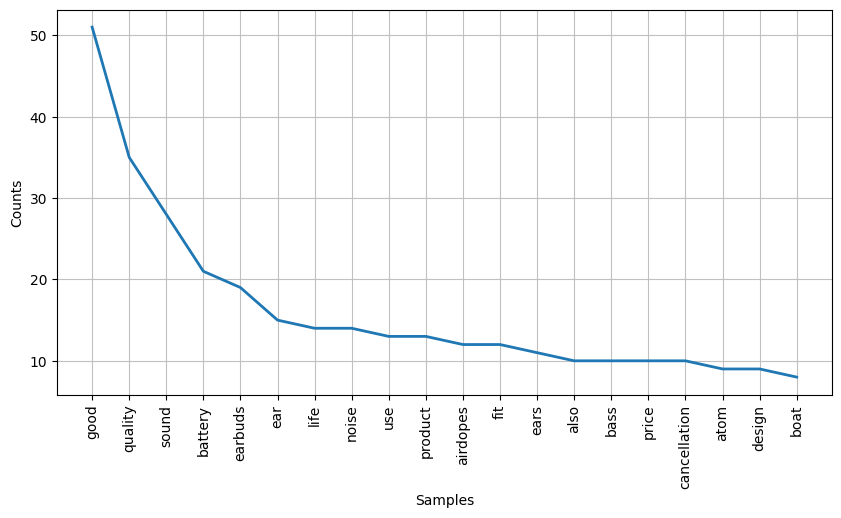

In [ ]:
#Top Most Common 20 words
plt.figure(figsize=(10,5))
freq_dist.plot(20, cumulative=False)
plt.show()

In [ ]:
wc = ' '.join(tokens)

In [ ]:
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(wc)

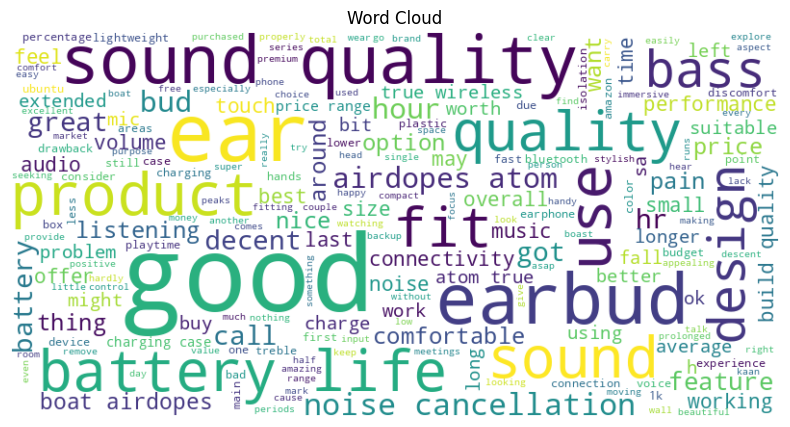

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vc = CountVectorizer()

In [ ]:
X_bow = vc.fit_transform(data)

In [ ]:
feature_names_bow = vc.get_feature_names_out()
feature_names_bow[0:50]

array(['00', '01', '04', '10', '100', '1000', '1000rs', '11', '1200',
       '1k', '1week', '20', '22', '30', '3hrs', '40', '45', '50', '80',
       '81', '899', '900rs', '999', 'about', 'absolute', 'acceptable',
       'accidental', 'accordingly', 'ache', 'achieving', 'activities',
       'activity', 'actually', 'additional', 'additionally', 'advantage',
       'affecting', 'affordable', 'after', 'airdope', 'airdopes',
       'airpods', 'al', 'all', 'allowing', 'alone', 'also', 'alternative',
       'always', 'am'], dtype=object)

In [ ]:
X_bow_array = X_bow.toarray()
X_bow_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
vc.vocabulary_

{'the': 618,
 'boat': 103,
 'airdopes': 40,
 'atom': 68,
 '81': 19,
 'true': 644,
 'wireless': 699,
 'earbuds': 207,
 'have': 306,
 'some': 585,
 'good': 288,
 'features': 249,
 'and': 54,
 'also': 46,
 'few': 254,
 'drawbacks': 200,
 'overall': 470,
 'this': 630,
 'is': 341,
 'an': 53,
 'average': 71,
 'choice': 140,
 'for': 266,
 'those': 631,
 'looking': 383,
 'affordable': 37,
 'starting': 595,
 'with': 700,
 'positives': 499,
 'sound': 588,
 'quality': 522,
 'of': 449,
 'these': 624,
 'quite': 523,
 'audio': 70,
 'clear': 143,
 'balanced': 80,
 'decent': 174,
 'bass': 82,
 'enjoyed': 217,
 'listening': 376,
 'to': 637,
 'music': 428,
 'watching': 682,
 'videos': 670,
 'as': 62,
 'they': 625,
 'provided': 516,
 'immersive': 325,
 'experience': 233,
 'battery': 84,
 'life': 370,
 'another': 56,
 'positive': 498,
 'aspect': 64,
 'themselves': 621,
 'can': 122,
 'last': 361,
 'around': 61,
 'hours': 317,
 'on': 455,
 'single': 575,
 'charge': 135,
 'which': 692,
 'their': 619,
 'price

In [ ]:
pd.DataFrame.from_records([vc.vocabulary_]).T.sort_values(0, ascending=False).iloc[0:50]

,0
നല,717
ധന,716
your,715
you,714
yahi,713
would,712
worthy,711
worth,710
worrying,709
works,708


In [ ]:
pd.DataFrame.from_records([vc.vocabulary_]).T.sort_values(0, ascending=False).tail(50)

,0
am,49
always,48
alternative,47
also,46
alone,45
allowing,44
all,43
al,42
airpods,41
airdopes,40


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf = TfidfVectorizer()

X_tfidf = vectorizer_tfidf.fit_transform(data)

feature_names_tfidf = vectorizer_tfidf.get_feature_names_out()

X_tfidf_array = X_tfidf.toarray()

print("Feature Names (TF-IDF):", feature_names_tfidf)
print("TF-IDF Matrix:")
print(X_tfidf_array)


Feature Names (TF-IDF): ['00' '01' '04' '10' '100' '1000' '1000rs' '11' '1200' '1k' '1week' '20'
 '22' '30' '3hrs' '40' '45' '50' '80' '81' '899' '900rs' '999' 'about'
 'absolute' 'acceptable' 'accidental' 'accordingly' 'ache' 'achieving'
 'activities' 'activity' 'actually' 'additional' 'additionally'
 'advantage' 'affecting' 'affordable' 'after' 'airdope' 'airdopes'
 'airpods' 'al' 'all' 'allowing' 'alone' 'also' 'alternative' 'always'
 'am' 'amazing' 'amazon' 'ambient' 'an' 'and' 'android' 'another' 'any'
 'appealing' 'are' 'areas' 'around' 'as' 'asap' 'aspect' 'aspects'
 'assume' 'at' 'atom' 'attractive' 'audio' 'average' 'baar' 'back'
 'background' 'backup' 'bad' 'bada' 'baki' 'balance' 'balanced' 'bar'
 'bass' 'bassy' 'battery' 'be' 'beast' 'beautiful' 'because' 'been'
 'being' 'below' 'best' 'bethte' 'better' 'between' 'bigger' 'bit' 'black'
 'blue' 'bluetooth' 'blutooth' 'boast' 'boat' 'bought' 'box' 'brand'
 'branding' 'bs' 'bucket' 'bud' 'budget' 'buds' 'build' 'built' 'but'
 

In [ ]:
vectorizer_ngram_range = CountVectorizer(analyzer='word', ngram_range=(1,1), max_features=718)
matrix_ngram = vectorizer_ngram_range.fit_transform(data)


In [ ]:
print(vectorizer_ngram_range.get_feature_names_out())

['00' '01' '04' '10' '100' '1000' '1000rs' '11' '1200' '1k' '1week' '20'
 '22' '30' '3hrs' '40' '45' '50' '80' '81' '899' '900rs' '999' 'about'
 'absolute' 'acceptable' 'accidental' 'accordingly' 'ache' 'achieving'
 'activities' 'activity' 'actually' 'additional' 'additionally'
 'advantage' 'affecting' 'affordable' 'after' 'airdope' 'airdopes'
 'airpods' 'al' 'all' 'allowing' 'alone' 'also' 'alternative' 'always'
 'am' 'amazing' 'amazon' 'ambient' 'an' 'and' 'android' 'another' 'any'
 'appealing' 'are' 'areas' 'around' 'as' 'asap' 'aspect' 'aspects'
 'assume' 'at' 'atom' 'attractive' 'audio' 'average' 'baar' 'back'
 'background' 'backup' 'bad' 'bada' 'baki' 'balance' 'balanced' 'bar'
 'bass' 'bassy' 'battery' 'be' 'beast' 'beautiful' 'because' 'been'
 'being' 'below' 'best' 'bethte' 'better' 'between' 'bigger' 'bit' 'black'
 'blue' 'bluetooth' 'blutooth' 'boast' 'boat' 'bought' 'box' 'brand'
 'branding' 'bs' 'bucket' 'bud' 'budget' 'buds' 'build' 'built' 'but'
 'buy' 'by' 'cable' 'call

In [ ]:
b = vectorizer_ngram_range.get_feature_names_out()

In [ ]:
from textblob import TextBlob

blob = TextBlob(wc)

sentiment_polarity = blob.sentiment.polarity

# Interpret the sentiment
if sentiment_polarity > 0:
    sentiment_label = 'Positive'
elif sentiment_polarity < 0:
    sentiment_label = 'Negative'
else:
    sentiment_label = 'Neutral'

# Display the result
print(f"Sentiment: {sentiment_label} (Polarity: {sentiment_polarity})")


Sentiment: Positive (Polarity: 0.3058785060425687)


In [ ]:
positive_count = 0
negative_count = 0
pos = []
neg = []

for text in b:
    # Create a TextBlob object
    blob = TextBlob(text)

    # Get the sentiment polarity
    sentiment_polarity = blob.sentiment.polarity

    # Classify as positive, negative, or neutral
    if sentiment_polarity > 0:
        print("Positive: ",text,sentiment_polarity)
        pos.append(text)
        positive_count += 1
    elif sentiment_polarity < 0:
        print("Negative: ",text,sentiment_polarity)
        neg.append(text)
        negative_count += 1

# Display the results
print(f"Number of Positive Sentiments: {positive_count}")
print(f"Number of Negative Sentiments: {negative_count}")
print(pos)
print(neg)

Positive:  absolute 0.2
Positive:  amazing 0.6000000000000001
Positive:  appealing 0.5
Positive:  attractive 0.8
Negative:  average -0.15
Negative:  bad -0.6999999999999998
Negative:  bass -0.15000000000000002
Positive:  beautiful 0.85
Positive:  best 1.0
Positive:  better 0.5
Negative:  black -0.16666666666666666
Negative:  casual -0.5000000000000001
Positive:  cheap 0.4
Positive:  classy 0.1
Positive:  clear 0.10000000000000002
Positive:  comfortable 0.4
Positive:  complete 0.1
Positive:  decent 0.16666666666666666
Negative:  down -0.15555555555555559
Negative:  due -0.125
Positive:  easily 0.43333333333333335
Positive:  easy 0.43333333333333335
Positive:  enjoyed 0.5
Positive:  enjoying 0.5
Negative:  everyday -0.2
Positive:  exactly 0.25
Positive:  excellent 1.0
Negative:  expected -0.1
Positive:  experienced 0.8
Negative:  fake -0.5
Negative:  false -0.4000000000000001
Positive:  fast 0.2
Negative:  few -0.2
Positive:  fine 0.4166666666666667
Positive:  first 0.25
Positive:  first

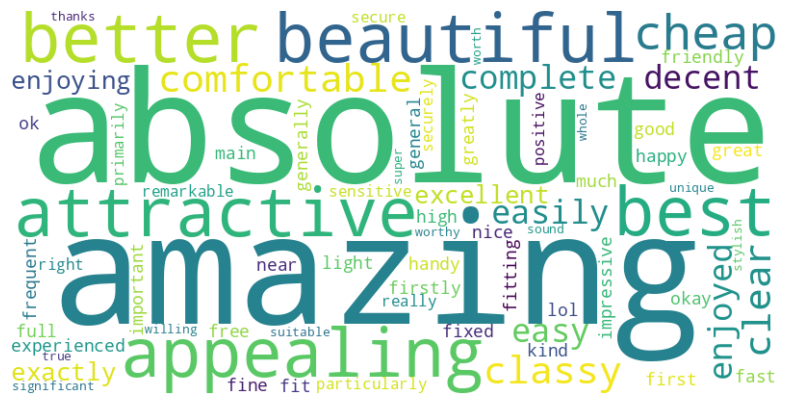

In [ ]:
positive_words = ['absolute', 'amazing', 'appealing', 'attractive', 'beautiful', 'best', 'better', 'cheap', 'classy', 'clear', 'comfortable', 'complete', 'decent', 'easily', 'easy', 'enjoyed', 'enjoying', 'exactly', 'excellent', 'experienced', 'fast', 'fine', 'first', 'firstly', 'fit', 'fitting', 'fixed', 'free', 'frequent', 'friendly', 'full', 'general', 'generally', 'good', 'great', 'greatly', 'handy', 'happy', 'high', 'important', 'impressive', 'kind', 'light', 'lol', 'main', 'more', 'most', 'much', 'near', 'nice', 'ok', 'okay', 'particularly', 'positive', 'primarily', 'really', 'remarkable', 'right', 'secure', 'securely', 'sensitive', 'significant', 'sound', 'stylish', 'suitable', 'super', 'thanks', 'true', 'unique', 'very', 'whole', 'willing', 'worth', 'worthy']

# Create a string of positive words
positive_text = ' '.join(positive_words)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

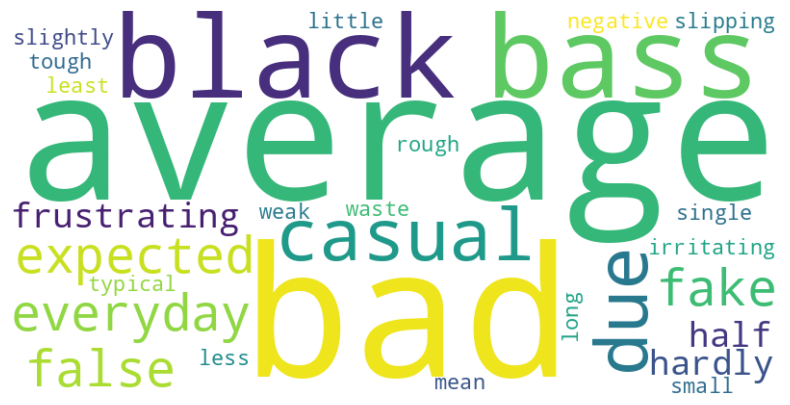

In [ ]:
negative_words = ['average', 'bad', 'bass', 'black', 'casual', 'down', 'due', 'everyday', 'expected', 'fake', 'false', 'few', 'frustrating', 'half', 'hardly', 'irritating', 'least', 'less', 'little', 'long', 'mean', 'negative', 'other', 'rough', 'single', 'slightly', 'slipping', 'small', 'tough', 'typical', 'waste', 'weak']

# Create a string of positive words
negative_text = ' '.join(negative_words)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#**CONCLUSION**

#Based on the analysis, we can say that the overall review of the boat earpods are considerably good.